In [18]:
train_dir=r"C:\Users\Dinesh Kumar\Documents\cricket_project\New folder\Original dataset\training"
val_dir=r"C:\Users\Dinesh Kumar\Documents\cricket_project\New folder\Original dataset\validation"
test_dir=r"C:\Users\Dinesh Kumar\Documents\cricket_project\New folder\Original dataset\testing"

In [19]:
from keras.preprocessing.image import ImageDataGenerator 
train_datagen= ImageDataGenerator (rescale=1./255) 
val_datagen= ImageDataGenerator (rescale=1./255,validation_split=0.9) 
test_datagen=ImageDataGenerator (rescale=1./255) 
size=128

In [20]:
train_generator = train_datagen.flow_from_directory( 
train_dir, 
target_size=(128,128), 
color_mode="rgb", 
batch_size=128, 
class_mode='binary', 
subset='training',                                                       
shuffle=True, 
seed=42)

Found 2225 images belonging to 2 classes.


In [21]:
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128,128),
    color_mode="rgb",
    batch_size=128,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 235 images belonging to 2 classes.


In [22]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [23]:
model = Sequential()
model.add(Flatten(input_shape=(128,128,3)))

model.add(Dense(512,activation='sigmoid'))
model.add(Dense(128,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 49152)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               25166336  
                                                                 
 dense_7 (Dense)             (None, 128)               65664     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 25232129 (96.25 MB)
Trainable params: 25232129 (96.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [48]:
mf = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=3,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/3
18/18 [==============================] - 17s 887ms/step - loss: 0.6527 - accuracy: 0.6575 - val_loss: 0.7754 - val_accuracy: 0.5064
Epoch 2/3
18/18 [==============================] - 13s 764ms/step - loss: 0.6484 - accuracy: 0.6575 - val_loss: 0.7410 - val_accuracy: 0.5064
Epoch 3/3
18/18 [==============================] - 13s 746ms/step - loss: 0.6456 - accuracy: 0.6575 - val_loss: 0.7162 - val_accuracy: 0.5064


In [27]:
train_accuracy = mf.history['accuracy'][-1]
print(train_accuracy)

0.6575281023979187


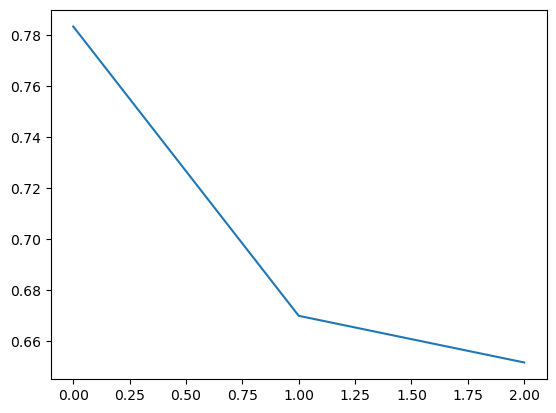

In [28]:
plt.plot(mf.history['loss'])

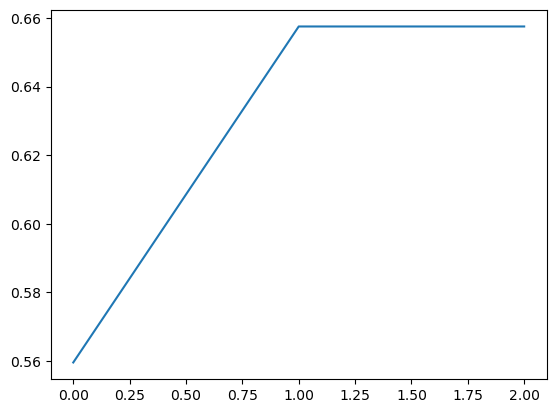

In [29]:
plt.plot(mf.history['accuracy'])

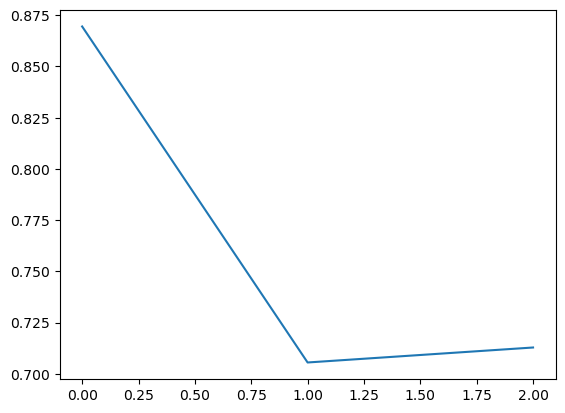

In [30]:
plt.plot(mf.history['val_loss'])

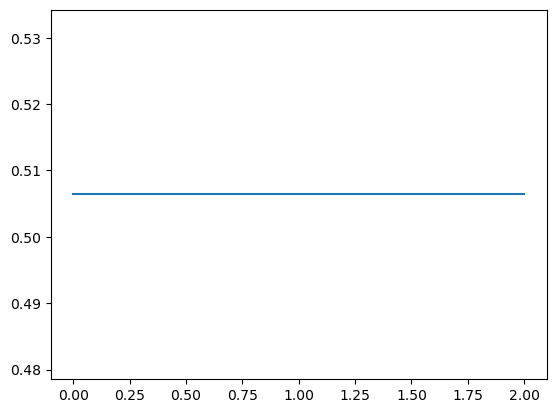

In [31]:
plt.plot(mf.history['val_accuracy'])

In [32]:
test_generator=test_datagen.flow_from_directory(
test_dir,
target_size=(128,128),
    batch_size=128,
    class_mode='binary'
)

Found 262 images belonging to 2 classes.


In [39]:
y_prob=model.predict(test_generator)
y_pred=y_prob.argmax(axis=1)

3/3 [==============================] - 2s 392ms/step


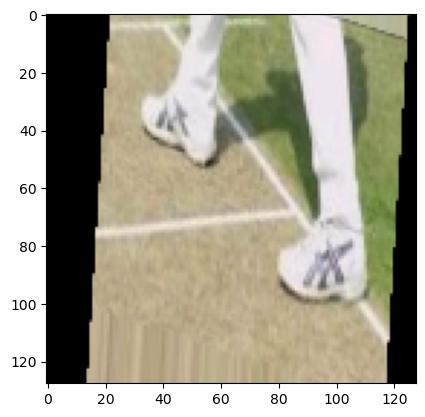

1/1 [==============================] - 0s 36ms/step
Predicted class: [0]
True class: 351


In [42]:
import numpy as np
individual_test_image = test_generator[0][0][5]
individual_test_label = test_generator[0][0][9]


plt.imshow(individual_test_image, cmap="gray")
plt.show()

prediction = model.predict(np.expand_dims(individual_test_image, axis=0)).argmax(axis=1)
print("Predicted class:", prediction)
print("True class:", individual_test_label.argmax())

In [43]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

3/3 [==============================] - 2s 399ms/step - loss: 0.7123 - accuracy: 0.5076
Test Loss: 0.7122620940208435
Test Accuracy: 0.5076335668563843


In [44]:
from tensorflow.keras.preprocessing import image

# Load the saved model
#model = ...  # Load your trained model here

# Load and preprocess an image for prediction
image_path = r'C:\Users\Dinesh Kumar\Documents\cricket_project\New folder\Original dataset\testing\Legal\Legal_0_1026.jpeg'
img = image.load_img(image_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to [0, 1]

# Make a prediction
predictions = model.predict(img_array)

# Interpret the prediction
if predictions[0] > 0.5:
    print("Predicted class: Positive")
else:
    print("Predicted class: Negative")

# Print the raw prediction value
print("Raw prediction:", predictions[0])


1/1 [==============================] - 0s 38ms/step
Predicted class: Positive
Raw prediction: [0.60455316]


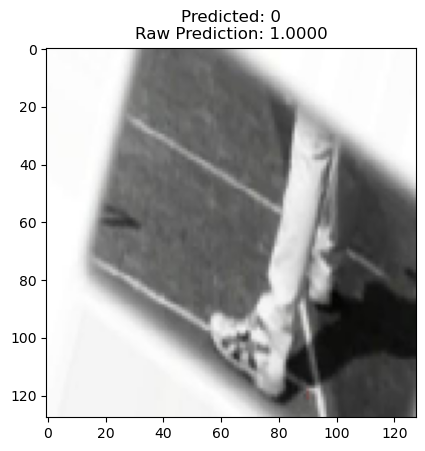

In [287]:
plt.imshow(img)
plt.title(f"Predicted: {0}\nRaw Prediction: {1:.4f}")
plt.axis('on')
plt.show()